### Date
21st November 1985

### Data

1. size - length across longest axis through umbilis
2. weight
  1. dry weight + shell
  2. dry weight - shell
  
### Method

1. Animals cleaned of adhering sand etc
2. Dried at 60 degrees C
3. Weighed on cahn
4. Measured with ocular micrometer
5. Shell dissolved in 2.5% HCl
6. Placed on foil dishes. Weight includes:
  1. periostracium
  2. operculum
7. Dried at 60 degrees C
8. Reweighted

### Analysis

Plot of size vs weight of shell and weight of tissue shows a power curve. Fit linear regression to obtain initial estimates of equation parameters on transformed data.

Ratio of weight tissue vs weight of shell appears to show no correlation with size. Therefore if shell weight is a good estimator of effort required to handle prey then there is no difference in the cost benefit ratio for different sizes (what does this mean!). Need to determine shell thickness to confirm.

Also need to know:
1. foraging activity -> time available for consumption
2. amount consumed vs size of prey
3. Number of prey that can be caught in a single foraging period
4. Probability of escape during drilling, some prey items have been found with partially drilled holes

### Notes
Tare set with 10 weight (silver) ??

## Import Data

Columns in the data file are:
- Size(mm)
- WtTotal       = total weight of dried animal 
- WtPaper       = the weight of the paper tray
- WtShellPaper  = the weight minus the shell (includes paper)
- WtTissue      =  WtShellPaper - WtPaper
- WtShell       = WtTotal - WtTissue
- TissueToShell = ration of tissues to shell weight

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA = '../data/isanda_coronata_size_wt.csv'

df = pd.read_csv(DATA)

df[0:5]

   Size(mm)   WtTotal   WtPaper   WtShellPaper   WtTissue   WtShell  \
0       4.3     23.17      3.29           5.26       1.97     21.20   
1       4.6     25.73      3.16           6.34       3.18     22.55   
2       4.5     22.14      3.34           6.41       3.07     19.07   
3       4.6     24.75      3.15           6.10       2.95     21.80   
4       2.7      4.42      3.27           3.82       0.55      3.87   

    TissueToShell  
0            0.09  
1            0.14  
2            0.16  
3            0.13  
4            0.14  

## Combined Plot

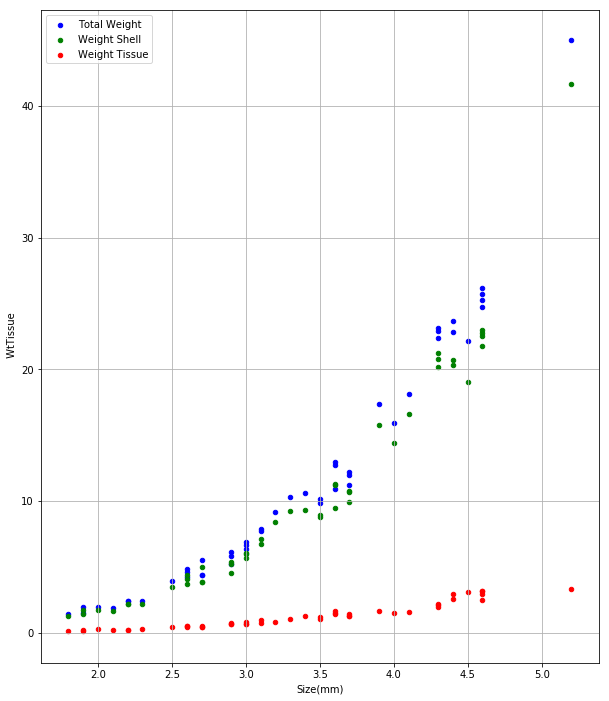

In [72]:
ax = df.plot.scatter(x='Size(mm)', y=' WtTotal', color='Blue', label='Total Weight', figsize=(10, 12))
df.plot.scatter(x='Size(mm)', y=' WtShell', color='Green', label='Weight Shell', ax=ax)
df.plot.scatter(x='Size(mm)', y=' WtTissue', color='Red', label='Weight Tissue', ax=ax)
ax.grid()

## Combined plot with log y axis

[]

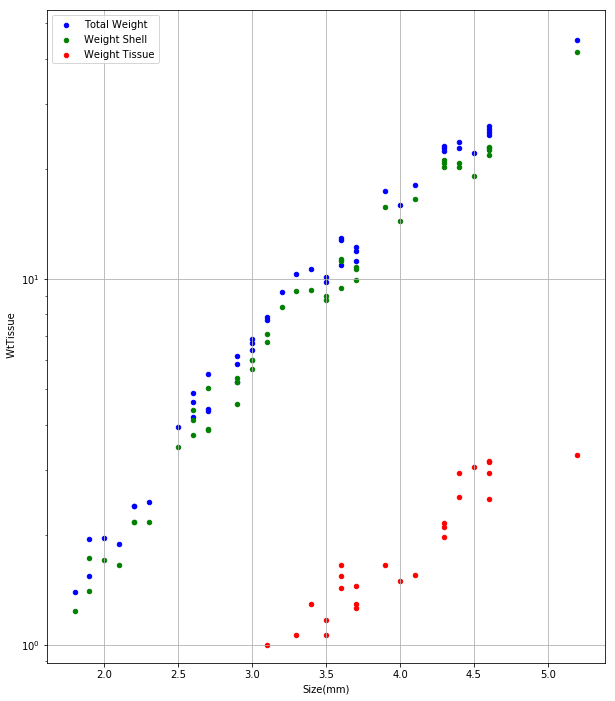

In [74]:
ax = df.plot.scatter(x='Size(mm)', y=' WtTotal', color='Blue', label='Total Weight', figsize=(10, 12))
df.plot.scatter(x='Size(mm)', y=' WtShell', color='Green', label='Weight Shell', ax=ax)
df.plot.scatter(x='Size(mm)', y=' WtTissue', color='Red', label='Weight Tissue', ax=ax)
ax.grid()
ax.semilogy()

### Size(mm) vs Tissue to Shell ratio 

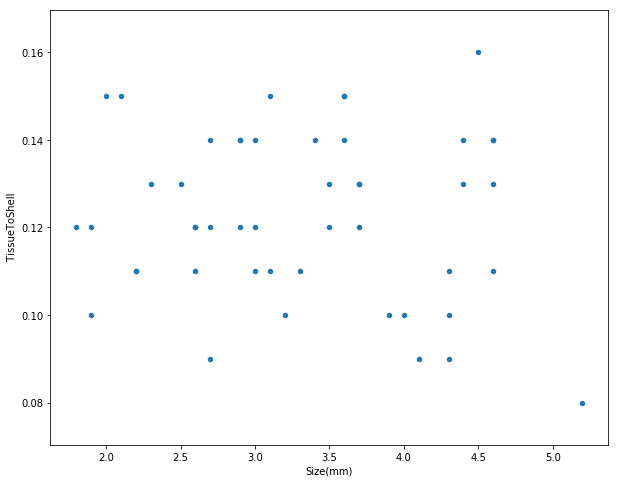

In [75]:
df.plot.scatter(x='Size(mm)', y=' TissueToShell', figsize=(10, 8))